# Introduction to Pandas Contd

In [1]:
import pandas as pd
df = pd.read_csv('data/ransomwaretracker.abuse.ch.txt')

### The Dataset Description

Ransomware Tracker offers feeds for Hosting-and Internet Service Providers, as well as for national CERTs/CSIRTs, Law Enforcement Agencies and other interested parties. The available feeds are described below. Unlike the blocklists provided by Ransomware Tracker, all feeds referenced below are generaed in real time whenever you hit it.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13866 entries, 0 to 13865
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Firstseen (UTC)  13866 non-null  object
 1   Threat           13865 non-null  object
 2   Malware          13865 non-null  object
 3   Host             13865 non-null  object
 4   URL              13865 non-null  object
 5   Status           13865 non-null  object
 6   Registrar        12076 non-null  object
 7   IP address(es)   8626 non-null   object
 8   ASN(s)           8626 non-null   object
 9   Country          8494 non-null   object
dtypes: object(10)
memory usage: 1.1+ MB


`info()` prints information about the DataFrame including the types.

## Data Visualization

A fundamental part of the data scientist's toolkit is data visualization. It is easy to create visualizuation, it is hard to produce good ones. We will explore the other useful data science libraries by visualizing data.

Pandas also provides methods of visualizations, we shall demonstrate both below.

In [3]:
# In order to show visualization inside the 
# notebook these calls must be made
%matplotlib inline

import matplotlib.pyplot as plt 

## Histogram 

A histogram is a display of data using bars of different heights. It is similar to a bar chart, but a histogram groups numbers into ranges. We rely on the function `value_counts()` to return a series containing counts of unique values.

In [4]:
df['Threat'].value_counts()

Distribution Site    11297
Payment Site          1660
C2                     908
Name: Threat, dtype: int64

This information is passed to the histogram function `hist()` and presented below.

<AxesSubplot:>

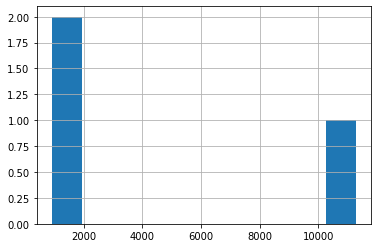

In [5]:
df['Threat'].value_counts().hist()

In [6]:
df['Malware'].value_counts()

Locky            11340
Cerber            1572
TeslaCrypt         477
CryptoWall         211
TorrentLocker      120
GlobeImposter       99
PayCrypt            21
Sage                 9
CTB-Locker           6
PadCrypt             4
DMALocker            3
FAKBEN               3
Name: Malware, dtype: int64

<AxesSubplot:>

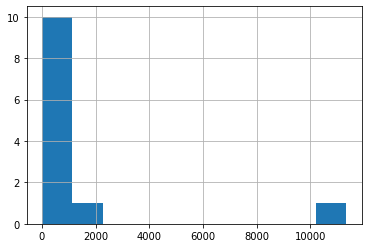

In [7]:
df['Malware'].value_counts().hist()

<AxesSubplot:>

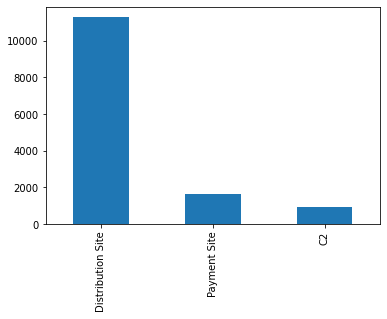

In [8]:
# Pandas
df['Threat'].value_counts().plot(kind='bar')

## Bar Charts

A bar chart can be very helpful, simple visualization when you need to illustrate quantities of a discrete set of items. The following is an example of how we can create a simple bar graph to visualize the number of hosts held by different countries.

`nlargest()` return the first `n` rows with the largest values in columns in descending order.

<AxesSubplot:>

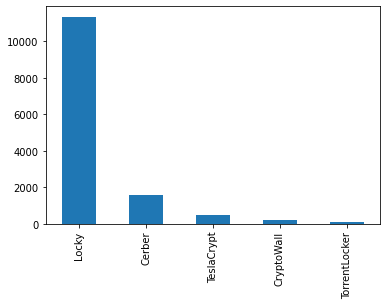

In [7]:
df['Malware'].value_counts().nlargest(5).plot(kind='bar')

## Line Charts

Line charts can be very useful in illustrating trends, and be very useful for visualizing data. A type of chart which displays information as a series of data points called markers connected by straight line segments. It is a basic type of chart common in many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically. In these cases they are known as run charts.

In [8]:
df['Firstseen (UTC)'].head()

0    2018-08-12 00:46:13
1    2018-08-10 05:43:15
2    2018-08-10 05:43:15
3    2018-08-09 16:50:50
4    2018-08-09 07:16:22
Name: Firstseen (UTC), dtype: object

In order to build a time-series line chart, we must first convert the column `df['Firstseen (UTC)]` into a datetime object.

In [9]:
df['Firstseen (UTC)'].head()

df['datetime'] =  pd.to_datetime(df['Firstseen (UTC)'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13866 entries, 0 to 13865
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Firstseen (UTC)  13866 non-null  object        
 1   Threat           13865 non-null  object        
 2   Malware          13865 non-null  object        
 3   Host             13865 non-null  object        
 4   URL              13865 non-null  object        
 5   Status           13865 non-null  object        
 6   Registrar        12076 non-null  object        
 7   IP address(es)   8626 non-null   object        
 8   ASN(s)           8626 non-null   object        
 9   Country          8494 non-null   object        
 10  datetime         13865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(10)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='datetime'>

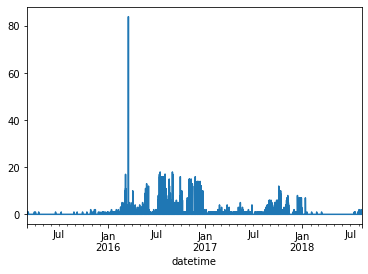

In [11]:
df1 = df.set_index('datetime')
# df1.head()
df1['Threat'].resample('1T').count().plot()

## Scatterplot

A two-dimensional data visualization that uses dots to represnt the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. Our dataset does not work well for this visualization, but in order to demonstrate it below.

<AxesSubplot:xlabel='length', ylabel='width'>

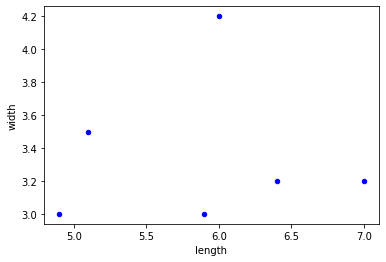

In [12]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1], 
                  [6.4, 3.2, 1], [5.9, 3.0, 2], [6.0, 4.2, 1]],
                 columns=['length', 'width', 'species'])
df.plot.scatter(x='length', y='width', c='Blue')

## Exercise 3

Using your provided dataset (ransomwaretracker.abuse.ch.txt) answer the questions below:
* Represent in the appropriate plot the distirbution of frequency in IP addresses
* Represent in the appropriate plot the frequency of each unique IP address
* Have fun! Choose any visualization you wish, and use the data to create a plot that helps you solve a problem or visualize the data

Reference: 
* https://github.com/ADSA-UIUC/intro-to-pandas-and-matplotlib/blob/master/intro-to-pandas-and-matplotlib-completed.ipynb
* https://datadrivensecurity.info/blog/pages/dds-dataset-collection.html
* https://ransomwaretracker.abuse.ch/feeds/